Do Americans like how Trump is handling COVID-19?
---------------

For this data exploration, I will closely look at data from polls, asking Americans asking whether or not they approve of the way Donald Trump is handling the COVID-19 pandemic. Poll takers are segmented by political party and expressed their approval using a letter grade. My goal for this exploration is to (1) understand the structure of the dataset as well as (2) extract meaningul insights from the poll data.

In [1]:
import pandas as pd

approval = pd.read_csv('Data/covid_approval_polls_adjusted.csv')

First, I need to import the `panda` dataframe, which will locate and read the csv.file. I then assign the csv reader to a variable, *approval*.

In [2]:
approval.shape

(2110, 19)

I use the `shape` command to see how many rows and columns are present in a file. 

The output show that the file contains 2110 rows and 19 columns.

In [3]:
approval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110 entries, 0 to 2109
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subject              2110 non-null   object 
 1   modeldate            2110 non-null   object 
 2   party                2110 non-null   object 
 3   startdate            2110 non-null   object 
 4   enddate              2110 non-null   object 
 5   pollster             2110 non-null   object 
 6   grade                1639 non-null   object 
 7   samplesize           2110 non-null   float64
 8   population           2110 non-null   object 
 9   weight               2110 non-null   float64
 10  influence            2110 non-null   float64
 11  multiversions        4 non-null      object 
 12  tracking             242 non-null    object 
 13  approve              2107 non-null   float64
 14  disapprove           2095 non-null   float64
 15  approve_adjusted     2107 non-null   f

I use the `info.()` command to get better insight of the data set. 

The output shows me a total of 19 columns, count of non-null values per column, and datatype of the value. Because I'm using panda dataframe, the datatypes are labled differently from python, as evidenced by 'object' instead of 'string' and 'float64' instead of 'float.'

In [4]:
approval.head()

,subject,modeldate,party,startdate,enddate,pollster,grade,samplesize,population,weight,influence,multiversions,tracking,approve,disapprove,approve_adjusted,disapprove_adjusted,timestamp,url
0,Trump,1/15/21,D,1/13/21,1/13/21,Data for Progress,B-,448.0,a,0.671966,0.671966,NaN,NaN,12.09,85.82,10.515244,87.727721,1/15/21 9:30,https://docs.google.com/spreadsheets/d/1cIEEkz...
1,Trump,1/15/21,R,1/13/21,1/13/21,Data for Progress,B-,377.0,a,0.600852,0.600852,NaN,NaN,75.34,21.39,75.684908,20.888396,1/15/21 9:30,https://docs.google.com/spreadsheets/d/1cIEEkz...
2,Trump,1/15/21,all,1/13/21,1/13/21,Data for Progress,B-,946.0,a,1.028905,1.028905,NaN,NaN,41.29,55.35,40.496691,56.440627,1/15/21 9:30,https://docs.google.com/spreadsheets/d/1cIEEkz...
3,Trump,1/15/21,D,1/10/21,1/12/21,YouGov,B,561.0,a,0.648201,0.607854,NaN,NaN,9.00,88.00,8.009537,89.920252,1/15/21 9:30,https://docs.cdn.yougov.com/4yijjbkc2z/econTab...
4,Trump,1/15/21,I,1/10/21,1/12/21,YouGov,B,594.0,a,0.666403,0.666403,NaN,NaN,36.00,51.00,34.509974,56.370969,1/15/21 9:30,https://docs.cdn.yougov.com/4yijjbkc2z/econTab...


I use the `head()` command to see the first 5 rows of the file. 

I see that the top rows contain the most recent polls, as evidenced by the 'startdate' and 'enddate' columns. According to the first row, the last poll conducted was actually this past week.

In [5]:
approval.tail()

,subject,modeldate,party,startdate,enddate,pollster,grade,samplesize,population,weight,influence,multiversions,tracking,approve,disapprove,approve_adjusted,disapprove_adjusted,timestamp,url
2105,Trump,1/15/21,all,2/7/20,2/9/20,Morning Consult,B/C,2200.0,a,0.768004,0.0,NaN,NaN,57.0,22.0,57.920834,23.455376,1/15/21 9:30,https://morningconsult.com/wp-content/uploads/...
2106,Trump,1/15/21,D,2/2/20,2/4/20,YouGov,B,523.0,a,0.542239,0.0,NaN,NaN,21.0,51.0,20.009537,52.920252,1/15/21 9:30,https://d25d2506sfb94s.cloudfront.net/cumulus_...
2107,Trump,1/15/21,I,2/2/20,2/4/20,YouGov,B,599.0,a,0.576709,0.0,NaN,NaN,39.0,25.0,37.509974,30.370969,1/15/21 9:30,https://d25d2506sfb94s.cloudfront.net/cumulus_...
2108,Trump,1/15/21,R,2/2/20,2/4/20,YouGov,B,376.0,a,0.459291,0.0,NaN,NaN,75.0,6.0,74.245536,7.311889,1/15/21 9:30,https://d25d2506sfb94s.cloudfront.net/cumulus_...
2109,Trump,1/15/21,all,2/2/20,2/4/20,YouGov,B,1500.0,a,0.785532,0.0,NaN,NaN,42.0,29.0,42.000328,31.243714,1/15/21 9:30,https://d25d2506sfb94s.cloudfront.net/cumulus_...


I use the `tail()` command to see last 5 rows of the file.

According to the last row, the first poll conducted back in February 2020.

In [6]:
approval['grade']

0        B-
1        B-
2        B-
3         B
4         B
       ... 
2105    B/C
2106      B
2107      B
2108      B
2109      B
Name: grade, Length: 2110, dtype: object

By combining the data name *approval* and column header 'grade,' I get a cursory glance of the values in the column. This command also gives a profile breakdown of the column at the bottom. 

The output shows me that there are 2110 rows in the 'grade' column, and data types are `objects` (`strings`).

In [7]:
approval['grade'].value_counts()

B      500
B/C    445
B-     197
D-     112
C      109
A+      93
A-      51
B+      36
C-      28
A       24
A/B     23
C/D     16
C+       5
Name: grade, dtype: int64

`value_counts()` gives me the individual counts for each value in a chosen column. 

The output after applying the command to the 'grade' column shows that a majority of people rate Trump's handling of COVID-19 a B or B/C grade, while few people are giving him an A and C grade.

In [8]:
grade_count = approval['grade'].value_counts()
grade_count

B      500
B/C    445
B-     197
D-     112
C      109
A+      93
A-      51
B+      36
C-      28
A       24
A/B     23
C/D     16
C+       5
Name: grade, dtype: int64

I assign the previous `value_counts()` command to a variable, *grade_count*. 

Now, whenver I return the variable, I get the same output.

In [9]:
grade_count = grade_count.reset_index()
grade_count

,index,grade
0,B,500
1,B/C,445
2,B-,197
3,D-,112
4,C,109
5,A+,93
6,A-,51
7,B+,36
8,C-,28
9,A,24


The `reset_index()` command converts this array into a data frame that we can later manipulate into a plot. 

The output shows an index for every row of grades and the count to the right. 

In [10]:
grade_count.columns = ['grade','count']
grade_count

,grade,count
0,B,500
1,B/C,445
2,B-,197
3,D-,112
4,C,109
5,A+,93
6,A-,51
7,B+,36
8,C-,28
9,A,24


I'm using `columns` to rename the column headers from 'index' and 'grade' to 'grade' and 'count,' respectively.

The output shows the columns header have been changed appropriately to 'grade' and 'count.'

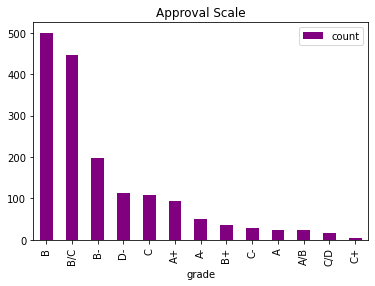

In [11]:
grade_count.plot.bar(x = 'grade', y = 'count' , title = 'Approval Scale', color = 'purple')

I use `plot.bar()` to create a bar graph using the columns from the *grade_count* data frame. I set the 'grade' column as the x-axis and 'count' as the y-axis.

The output is a bar graph displaying the different approval grades that represent Americans' thoughts on Trump's handling of the pandemic. The bar graph is organized from greatest to least, from left to right. 

In [12]:
desired_columns = ['party','grade'] # list of desired column names
approval[desired_columns] # subset based on desired columns
approval_trimmed = approval[desired_columns].copy() #assign subset to a variable
approval_trimmed

,party,grade
0,D,B-
1,R,B-
2,all,B-
3,D,B
4,I,B
...,...,...
2105,all,B/C
2106,D,B
2107,I,B
2108,R,B


I create a list of desired column names from the original data frame, *approval*, and create a subset based on my desired columns, 'party' and 'grade.' I attach a `copy()` to the subset and assign the subset to a variable, *approval_trimmed*.

The output is a trimmed version of the csv.file and only shows the 'party' and 'grade' columns. 

In [13]:
approval_trimmed.query("party == 'D'")
dem_approval= approval_trimmed.query("party == 'D'")
dem_approval

,party,grade
0,D,B-
3,D,B
7,D,B/C
12,D,B
16,D,B/C
...,...,...
2090,D,B
2094,D,B
2098,D,B
2102,D,B/C


I use the `query` command to only select 'D' values (Democrats) in the 'party' column. I then assign the query to a variable, *dem_approval*.

The output only displays rows for Democrats and their respective grade.

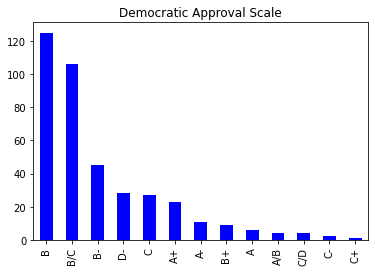

In [14]:
dem_count = dem_approval['grade'].value_counts()
dem_count.plot.bar(x = 'grade', y = 'count' , title = 'Democratic Approval Scale', color = 'blue')

I use the `value_counts()` command on the 'grade' column of the *dem_approval* subset and assign it to a new variable, *dem_count*. From there, I use the `plot.bar()` command to generate a bar graph. I set the 'grade' column as the x-axis and 'count' as the y-axis.

The output is a bar graph that only displays Democrats' approval grades. Most Democrats seem to give Trump an approval grade of B, while few rate him A's and C's

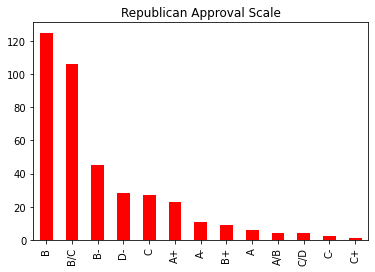

In [16]:
approval_trimmed.query("party == 'R'")
rep_approval= approval_trimmed.query("party == 'R'")
rep_count = rep_approval['grade'].value_counts()
rep_count.plot.bar(x = 'grade', y = 'count' , title = 'Republican Approval Scale', color = 'red')

I followed the same steps with segmenting the Democratic party but this time applied the operations with the Republican party.

The output is a bar graph that only displays Democrats' approval grades; it appears that the distribution of scores are consistent with that of the Democratic party.